In [ ]:
import os, sys, subprocess

REPO = "https://github.com/jongmoonha/Signal_Processing_Practice.git"
DIR  = "Signal_Processing_Practice"

try:
    import google.colab  # Colab 전용 모듈
    if not os.path.isdir(DIR):
        subprocess.run(["git","clone",REPO], check=True)
    print('We are in Google Colab environment.')
    os.chdir('/content/'+DIR)
    print('Current working directory:', os.getcwd())

except ImportError:
    print('We are in a local environment, not Google Colab.')
    pass

# 엔진소리에 대한 FFT 수행

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
plt.rc('font', size=15)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 데이터 로드

## 신호 로드하고 그려보기

### 신호 로드하기

In [4]:
try:
    import librosa
except ImportError:
    %pip install librosa

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import librosa


file_path1 = './data/autorash.mp3'
v_a, fs_a = librosa.load(file_path1, sr=None)

file_path2 = './data/knocking.mp3'
v_k, fs_k = librosa.load(file_path2, sr=None)

print(np.shape(v_a))
print(np.shape(v_k))
print(fs_a)
print(fs_k)

(81792,)
(51840,)
44100
44100


In [6]:
slice_length = len(v_k) # 두 음성 신호의 길이를 맞춰주기 위한 코드

v_a = v_a[:slice_length]
T_a = len(v_a) / fs_a
t_a = np.arange(1/fs_a, T_a + 1/fs_a, 1/fs_a)

# Knocking 데이터
T_k = len(v_k) / fs_k
t_k = np.arange(1/fs_k, T_k + 1/fs_k, 1/fs_k)


### 신호 그리기

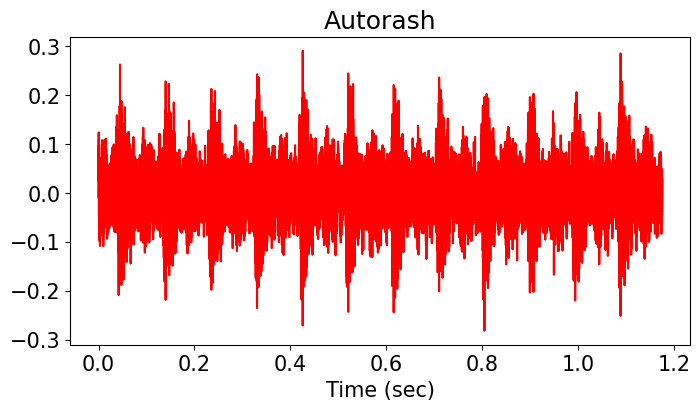

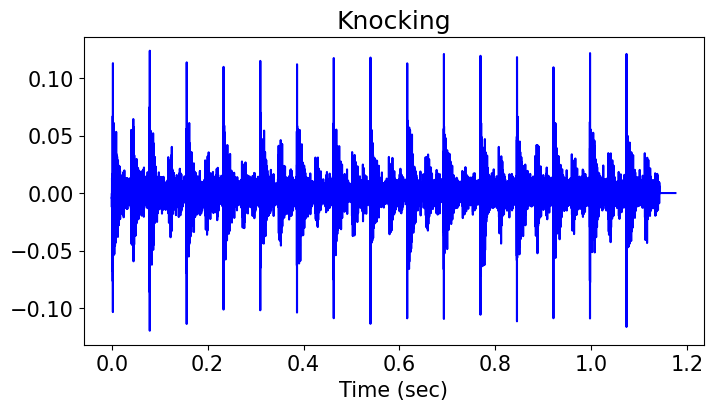

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(t_a, v_a, 'r')
plt.title('Autorash')
plt.xlabel('Time (sec)')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(t_a, v_k, 'b')
plt.title('Knocking')
plt.xlabel('Time (sec)')
plt.show()

## 주파수 분석해보기

In [8]:
import utils

f1, A1 = utils.fft_simple(v_a,fs_a) # Autorash
f2, A2 = utils.fft_simple(v_k,fs_k) # Knocking

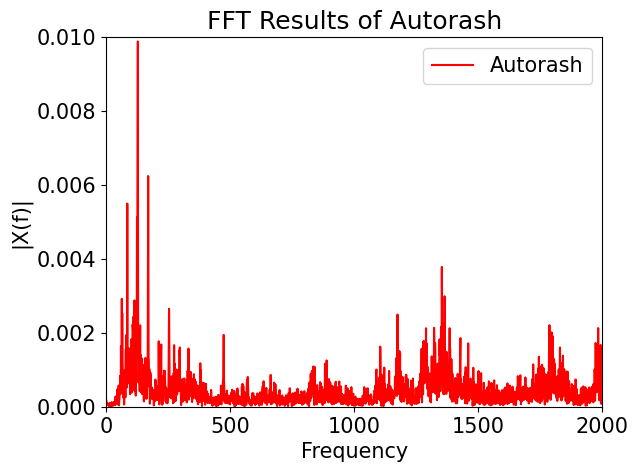

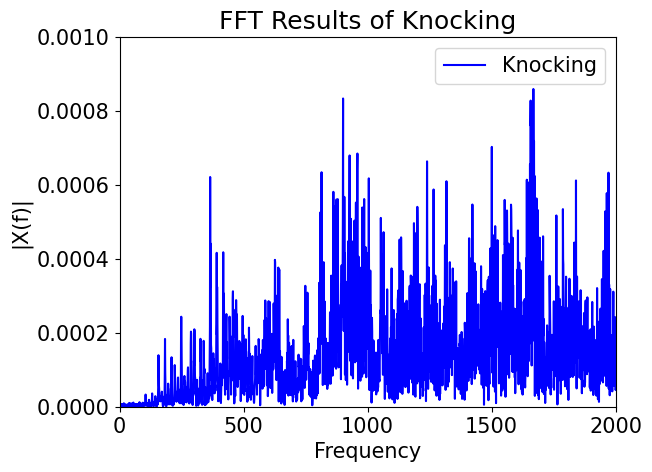

In [9]:
# 각 FFT 결과를 플롯에 추가
plt.figure()
plt.plot(f1, A1, 'r', label='Autorash')
plt.xlabel('Frequency')
plt.ylabel('|X(f)|')
plt.xlim([0, 2000])
plt.ylim([0, 0.01])
plt.title('FFT Results of Autorash')
plt.legend()
plt.show()

plt.figure()
plt.plot(f2, A2, 'b', label='Knocking')
plt.xlabel('Frequency')
plt.ylabel('|X(f)|')
plt.xlim([0, 2000])
plt.ylim([0, 0.001])
plt.title('FFT Results of Knocking')
plt.legend()
plt.show()


### 각 FFT Results zoomed

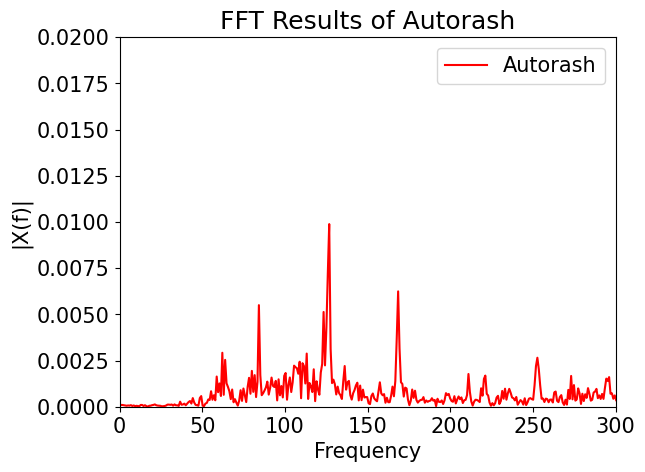

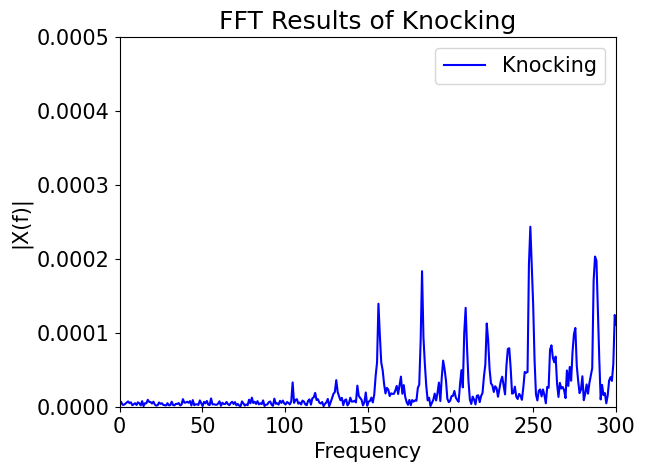

In [10]:
# 각 FFT 결과를 플롯에 추가
plt.figure()
plt.plot(f1, A1, 'r', label='Autorash')

plt.xlabel('Frequency')
plt.ylabel('|X(f)|')
plt.xlim([0, 300])
plt.ylim([0, 0.02])
plt.title('FFT Results of Autorash')
plt.legend()

plt.show()

plt.figure()

plt.plot(f2, A2, 'b', label='Knocking')

plt.xlabel('Frequency')
plt.ylabel('|X(f)|')
plt.xlim([0, 300])
plt.ylim([0, 0.0005])
plt.title('FFT Results of Knocking')
plt.legend()

plt.show()


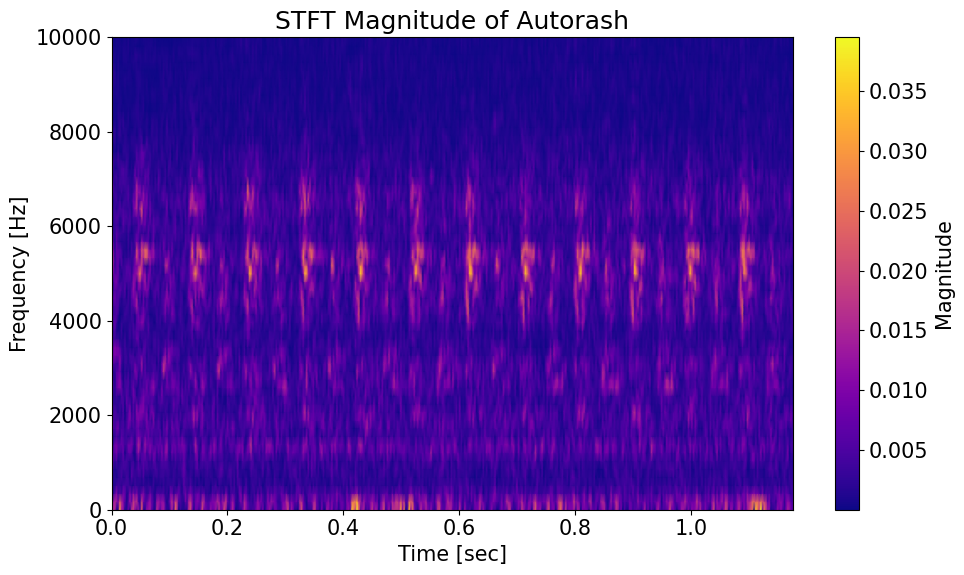

In [11]:
# STFT 계산 (여기서는 예제로 변수 v_a, fs_a 사용)
f_autorash, t_stft_autorash, Zxx_autorash = stft(v_a, fs=fs_a, nperseg=256, noverlap=128, nfft=256)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_stft_autorash, f_autorash, np.abs(Zxx_autorash), shading='gouraud', cmap='plasma')
plt.title('STFT Magnitude of Autorash')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.ylim(0, 10000)
plt.tight_layout()
plt.show()

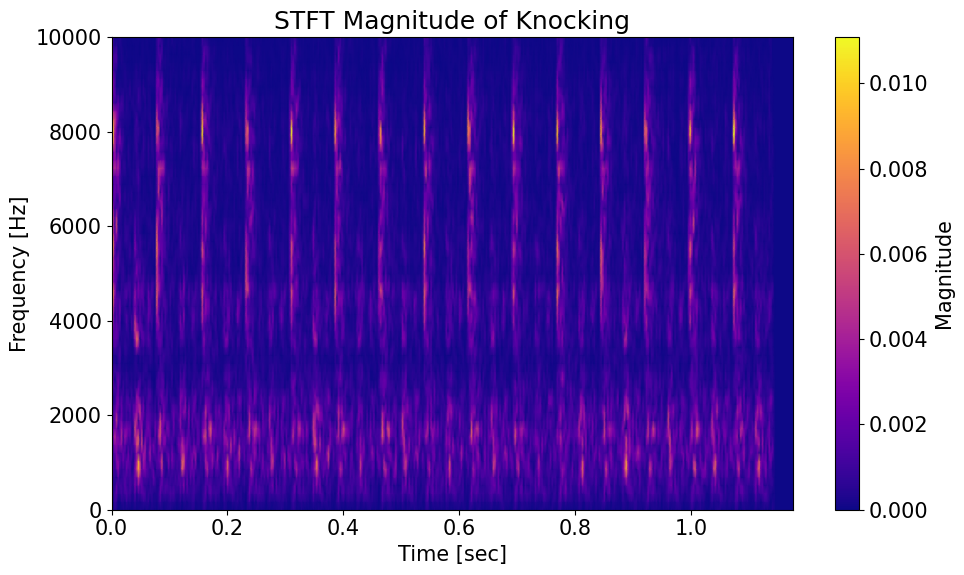

In [12]:
# STFT 계산 (여기서는 예제로 변수 v_k, fs_k 사용)
f_knocking, t_stft_knocking, Zxx_knocking = stft(v_k, fs=fs_k, nperseg=256, noverlap=128, nfft=256)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_stft_knocking, f_knocking, np.abs(Zxx_knocking), shading='gouraud', cmap='plasma')
plt.title('STFT Magnitude of Knocking')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.ylim(0, 10000)
plt.tight_layout()
plt.show()

# F1 Engine Music

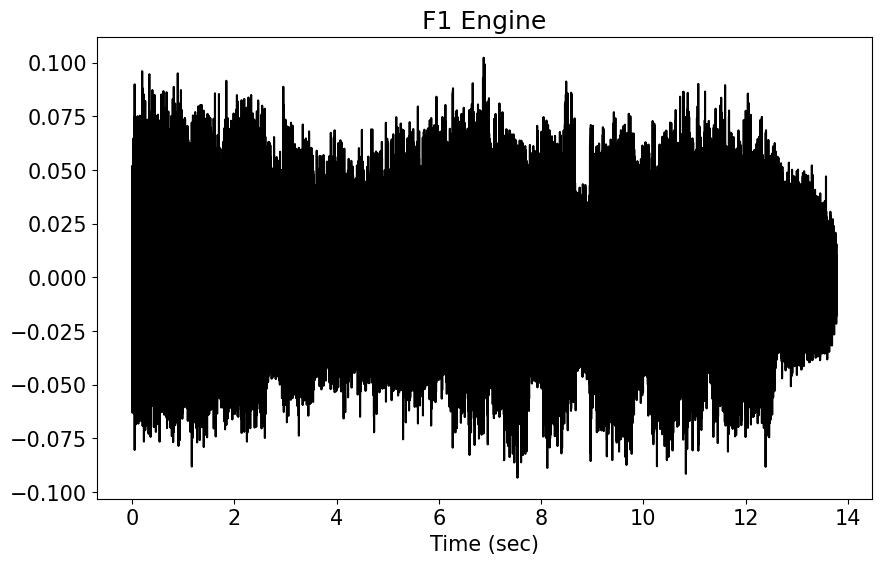

In [13]:
file_path3 = './data/f1music.mp3'
v_f1, fs_f1 = librosa.load(file_path3, sr=None)

T_f1 = len(v_f1) / fs_f1
t_f1 = np.arange(1/fs_f1, T_f1 + 1/fs_f1, 1/fs_f1)

plt.figure(figsize=(10,6))
plt.plot(t_f1, v_f1, 'k')
plt.title('F1 Engine')
plt.xlabel('Time (sec)')
plt.show()

## STFT

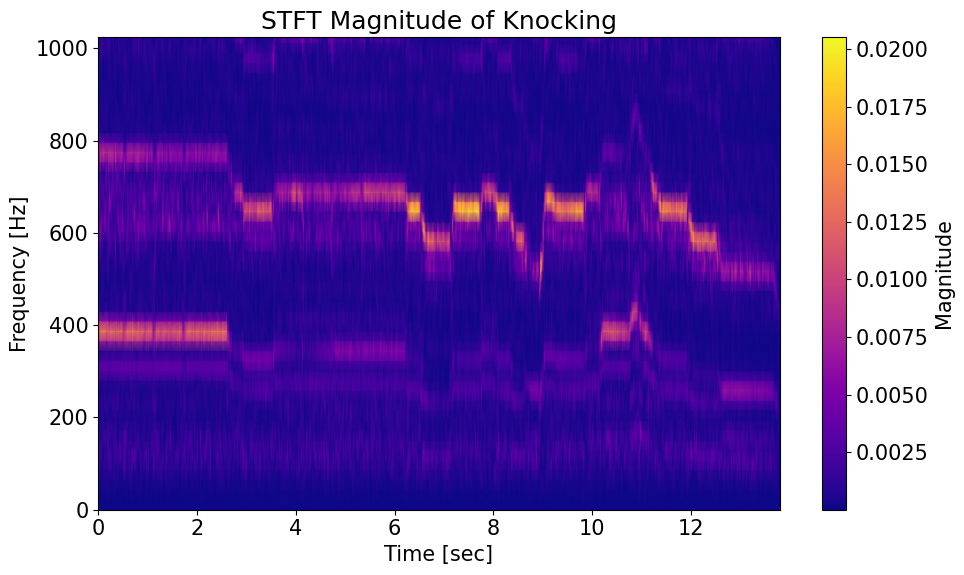

In [14]:
# STFT 계산 (여기서는 예제로 변수 v_k, fs_k 사용)
f_knocking, t_stft_knocking, Zxx_knocking = stft(v_f1, fs=fs_f1, nperseg=2048, noverlap=1024)
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_stft_knocking, f_knocking, np.abs(Zxx_knocking), shading='gouraud', cmap='plasma')
plt.title('STFT Magnitude of Knocking')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.ylim(0, 1024)
plt.tight_layout()
plt.show()

## Mel (Linear)

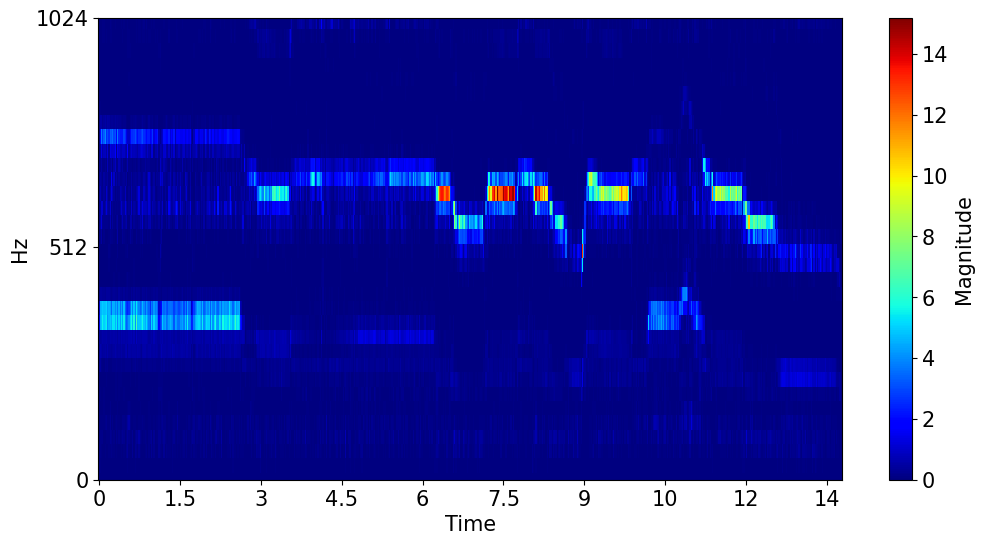

In [15]:
S = librosa.feature.melspectrogram(y=v_f1, sr=fs_f1, S=None, hop_length = 1024, win_length=2048)
plt.figure(figsize=(12, 6))
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S, x_axis='time', y_axis='mel', sr=fs_f1, hop_length=1024, cmap='jet')
plt.ylim(0, 1024)
plt.colorbar(label='Magnitude')


## Mel (dB)

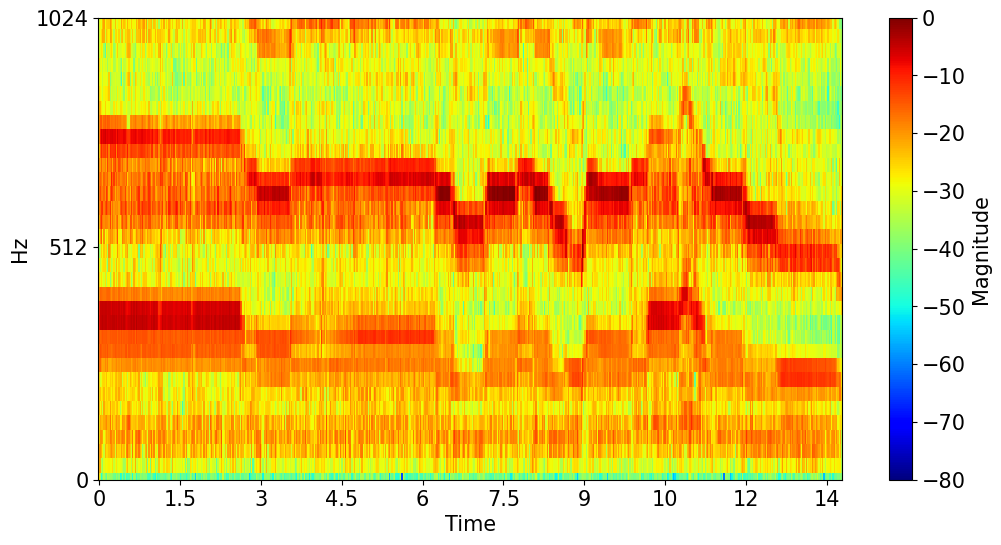

In [16]:
plt.figure(figsize=(12, 6))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=fs_f1, hop_length=1024, cmap='jet')
plt.ylim(0, 1024)
plt.colorbar(label='Magnitude')
